In [1]:
import numpy as np
from cell_to_points import Cell2PointsConverter
from strict import StrictSolve
from opt import OptSolve
from helpers import *
from matplotlib import pyplot as plt
%matplotlib inline

In [99]:
c2p = Cell2PointsConverter(orders=[[3],[3,3]])

In [100]:
strict_solve = StrictSolve(points=c2p.get_points(), weights=c2p.get_diag_weights(), verbose=True)

In [101]:
strict_solve.fit_strict(max_power=strict_solve.get_max_pow(risky=False), method='svd')

Number of equations: 22
Number of degrees of freedom: 28
Strictly stitched_power: 1
Start solving strict part
Nullspace shape: (28, 8)
End solving strict part
NullspaceRank: 8


In [102]:
interps = strict_solve.get_interpolants()
wgths = strict_solve.get_weight_matrices()

In [105]:
opt_solve = OptSolve(matrices=interps,
                     points=c2p.get_points(),
                     strict_power=strict_solve.get_max_pow(risky=False),
                     weights_matrices=wgths,
                     verbose=True
                    )

In [ ]:
opt_solve.fit_opt(constraints=True, tr_fun_option='chebyshev', orders_forwards=2)

In [83]:
opt_solve.restart_opt(tolerance=1e-3)

Results are saved, get your interploants in I_rl and I_lr fields or restart with higher tolerance


In [56]:
I_rl = np.array(opt_solve.I_rl_subbed).astype(np.float64)
I_lr = np.array(opt_solve.I_lr_subbed).astype(np.float64)

In [ ]:
tr_f = np.vectorize(lambda x: np.sin(3*x))

In [ ]:
eps_l, eps_r = convergence_test(I_lr=I_lr,
                                I_rl=I_rl,
                                p_l=opt_solve.points[0],
                                p_r=opt_solve.points[1],
                                init_size=(0,1),
                                tr_f=tr_f,
                                weights=[np.array(strict_solve.W_l), np.array(strict_solve.W_r)],
                                div_lim=7)

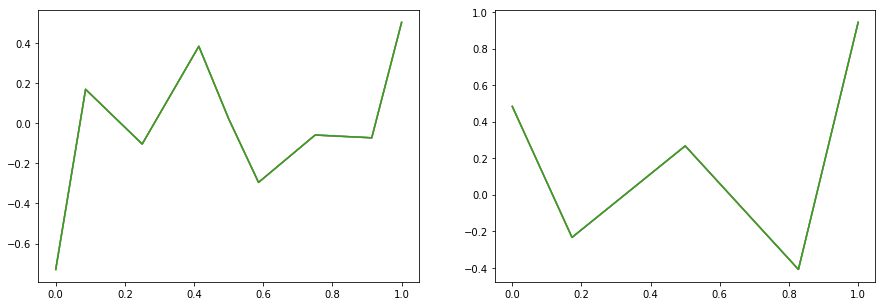

In [81]:
explosion_test(I_lr=I_lr,
               I_rl=I_rl,
               p_l=opt_solve.points[0],
               p_r=opt_solve.points[1],
               tr_f=tr_f,
               reps=3)

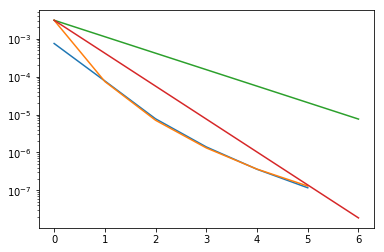

In [82]:
plt.semilogy(range(len(eps_l)), eps_l)
plt.semilogy(range(len(eps_r)), eps_r)
plt.semilogy(np.linspace(0, len(eps_r)), float(eps_r[0])*np.exp(-np.linspace(0, len(eps_r))))
plt.semilogy(np.linspace(0, len(eps_r)), float(eps_r[0])*np.exp(-2*np.linspace(0, len(eps_r))))